In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import math 
import tensorflow as tf 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
df=pdr.get_data_tiingo('AAPL', api_key='2f2a5f843b5119ecb7d4f9cf198a819a56af9b43')

In [3]:
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')
df1=df.reset_index()['close']
df1[1228:]

1228    148.56
1229    148.99
1230    146.77
1231    144.98
1232    145.64
1233    145.86
1234    145.52
1235    147.36
1236    146.95
1237    147.06
1238    146.14
1239    146.09
1240    145.60
1241    145.86
1242    148.89
1243    149.10
1244    151.12
1245    150.19
1246    146.36
1247    146.70
1248    148.19
1249    149.71
1250    149.62
1251    148.36
1252    147.54
1253    148.60
1254    153.12
1255    151.83
1256    152.51
1257    153.65
1258    154.30
Name: close, dtype: float64

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-06 00:00:00+00:00,107.70,108.30,107.51,107.90,26880391,25.246795,25.387446,25.202256,25.293679,107521564,0.0,1.0
1,AAPL,2016-09-07 00:00:00+00:00,108.36,108.76,107.07,107.83,42364328,25.401511,25.495278,25.099112,25.277269,169457312,0.0,1.0
2,AAPL,2016-09-08 00:00:00+00:00,105.52,107.27,105.24,107.25,53002026,24.735764,25.145995,24.670127,25.141307,212008104,0.0,1.0
3,AAPL,2016-09-09 00:00:00+00:00,103.13,105.72,103.13,104.64,46556984,24.175506,24.782648,24.175506,24.529477,186227936,0.0,1.0
4,AAPL,2016-09-12 00:00:00+00:00,105.44,105.72,102.53,102.65,45292770,24.717011,24.782648,24.034855,24.062985,181171080,0.0,1.0


In [5]:
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
df1.shape

(1259, 1)

In [7]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:], df1[training_size:len(df1),:1]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step=100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [10]:
print(X_train)

[[0.01134108 0.01297896 0.00593111 ... 0.04653067 0.04667957 0.04670439]
 [0.01297896 0.00593111 0.         ... 0.04667957 0.04670439 0.04591026]
 [0.00593111 0.         0.00573258 ... 0.04670439 0.04591026 0.04521541]
 ...
 [0.24841175 0.24473893 0.24858547 ... 0.40510224 0.39994044 0.40875025]
 [0.24473893 0.24858547 0.25332539 ... 0.39994044 0.40875025 0.40728608]
 [0.24858547 0.25332539 0.25156343 ... 0.40875025 0.40728608 0.39961783]]


In [11]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [12]:
X_train.shape

(717, 100)

In [13]:
X_train=tf.expand_dims(X_train,axis=2)
X_test=tf.expand_dims(X_test,axis=2)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [14]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 126ms/step - loss: 0.0090 - val_loss: 0.0396
Epoch 2/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0025 - val_loss: 0.0265
Epoch 3/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0013 - val_loss: 0.0223
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 8.0103e-04 - val_loss: 0.0209
Epoch 5/100
12/12 [==============================] - 0s 27ms/step - loss: 5.2447e-04 - val_loss: 0.0229
Epoch 6/100
12/12 [==============================] - 0s 24ms/step - loss: 5.2435e-04 - val_loss: 0.0206
Epoch 7/100
12/12 [==============================] - 0s 27ms/step - loss: 4.7765e-04 - val_loss: 0.0201
Epoch 8/100
12/12 [==============================] - 0s 26ms/step - loss: 4.4841e-04 - val_loss: 0.0201
Epoch 9/100
12/12 [==============================] - 0s 27ms/step - loss: 4.1672e-04 - val_loss: 0.0200
Epoch 10/100
12/12 [==============================] - 0s 26ms/step - loss: 

In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [18]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [19]:
math.sqrt(mean_squared_error(y_train, train_predict)),math.sqrt(mean_squared_error(y_test, test_predict))

(185.5557210295315, 224.39027154224186)

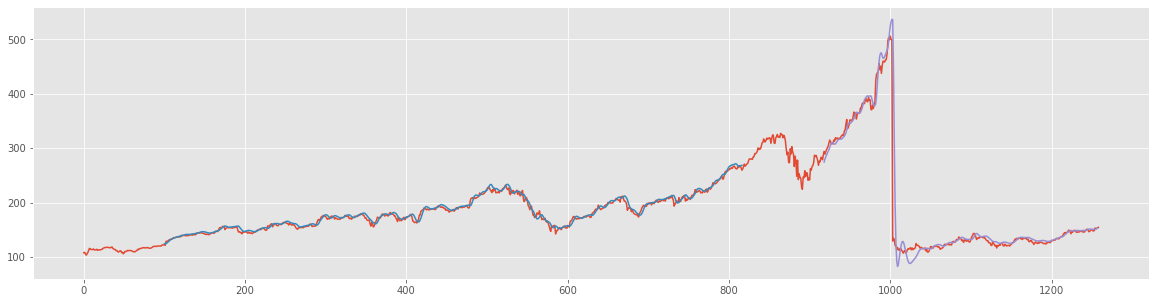

In [20]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df1) - 1, :] = test_predict

plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
